Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:


In [1]:
# Ваше решение
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

E0000 00:00:1741021788.305453  510572 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741021788.354127  510572 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
if not os.path.exists("bus"):
    !unzip -q bus.zip -d bus

In [3]:
base_folder = Path("bus")

x_all, y_all = [], []

for folder in base_folder.iterdir():
    for filename in folder.iterdir():
        img = image.load_img(filename, target_size=(128, 128), color_mode="grayscale")
        y_all.append(0 if folder.name == "Входящий" else 1)
        img_array = np.array(img).astype("float32") / 255.0
        x_all.append(img_array.flatten())
x_all = np.array(x_all)
y_all = np.array(y_all)

In [4]:
x_train, x_temp, y_train, y_temp = train_test_split(
    x_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [5]:
drop_rate = 0.3
input_shape = 128 * 128

model = Sequential()

model.add(Dense(512, input_shape=(input_shape,)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=["accuracy"],
)


/home/aledonio/.cache/pypoetry/virtualenvs/global-cKEoLTwX-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741021876.937010  510572 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
)

Epoch 1/50


I0000 00:00:1741021887.658720  511505 service.cc:148] XLA service 0x313d8ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741021887.658815  511505 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
I0000 00:00:1741021888.055251  511505 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1741021889.419671  511505 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


199/199 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6728 - loss: 0.6181 - val_accuracy: 0.5756 - val_loss: 0.8288
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8025 - loss: 0.4296 - val_accuracy: 0.6865 - val_loss: 0.6243
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8389 - loss: 0.3683 - val_accuracy: 0.7856 - val_loss: 0.4619
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8731 - loss: 0.3027 - val_accuracy: 0.8473 - val_loss: 0.3414
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8822 - loss: 0.2792 - val_accuracy: 0.8062 - val_loss: 0.4341
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8855 - loss: 0.2546 - val_accuracy: 0.8620 - val_loss: 0.3268
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9055 - loss: 0.2205 - val_accuracy: 0.8803 - val_loss: 0.3114
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9098 - loss: 0.2052 - val_accuracy: 0.6094 - val

In [7]:
# Оценка модели на тестовой выборке
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(
    f"Точность на обучающей выборке: {history.history['accuracy'][-1] * 100:.2f}%,\n"
    "Точность на валидационной выборке: "
    f"{history.history['val_accuracy'][-1] * 100:.2f}%,\n"
    f"Точность на тестовой выборке: {test_accuracy * 100:.2f}%"
)


Точность на обучающей выборке: 98.10%,
Точность на валидационной выборке: 95.15%,
Точность на тестовой выборке: 94.50%


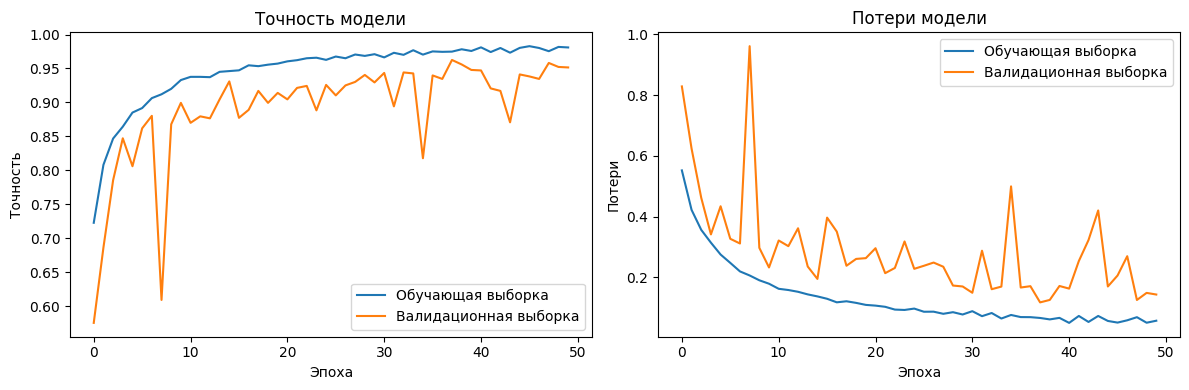

In [8]:
# Построение графиков точности и потерь
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Обучающая выборка")
plt.plot(history.history["val_accuracy"], label="Валидационная выборка")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Обучающая выборка")
plt.plot(history.history["val_loss"], label="Валидационная выборка")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()

plt.tight_layout()
plt.show()
